### Exploratory Data Analysing and Market Basket Analysis with Apriori 🍶🥤🍵
1. Dataset Information  
The dataset is stored in the file Assignment-1_Data.xlsx located at /kaggle/input/market-basket-analysis/. It contains information related to market transactions.
2. Aims and objectives
   + Within this project, I would like to explore the following:
       - Which country has the highest sales /revenue?
       - Which are most purchased items?
       - When did the company have the highest sales / revenue in a year? ( Which month?)

   + After that, we can use Association rule for a particular country in one year (2011):
        - Use Association rule mining process to deploy pattern recognition to identify and quantify relationship between different, yet related items.

` Know about the products frequently bought together to increase sales by: ` 
- Keep those items always available in their inventory
- Place them next to each other that people can pick them quickly
- Offer discounts in one purchase


3. Steps of the project
* [<span style='color:#f0bc22'> 1. |</span> Preprocessing & Feature engineering](#section-one)
* [<span style='color:#f0bc22'> 2. |</span> Exploratoty Data Analysis](#section-two)
* [<span style='color:#f0bc22'> 3. |</span> Association Analysis](#section-three)
* [<span style='color:#f0bc22'> 4. |</span> Conclusions](#section-four)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\hanhd\AppData\Local\Temp\ipykernel_20656\4264167829.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("input/Assignment-1_Data.csv", sep=';')
df.head()

BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  01.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  01.12.2010 08:26   

  Price  CustomerID         Country  
0  2,55     17850.0  United Kingdom  
1  3,39     17850.0  United Kingdom  
2  2,75     17850.0  United Kingdom  
3  3,39     17850.0  United Kingdom  
4  3,39     17850.0  United Kingdom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


**Numerical**: Price(Continuous) & Quantity ( Discrete) , Date (Timeseries)  
**Categorical**: BillNo, Itemname, CustomerID and Country (Nominal)  
**Blank or Null**: CustomerID & Itemname  

<a id="section-one"></a>
## <b><span style='color:#22f0d8'> 1. |</span> Preprocessing & Feature engineering

To be able to make use of the data for analysis, we need to perform a few pre-processing steps. Firstly, I would like reformat some columns, especially the date column such as "Date".

In [4]:
# Change type of Date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%d.%m.%Y %H:%M')

In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [6]:
# Check for empty values
df.isnull().any()

BillNo        False
Itemname       True
Quantity      False
Date          False
Price         False
CustomerID     True
Country       False
Year          False
Month         False
dtype: bool

In [7]:
# Xử lý null cột CustomerID
df = df.fillna('-')
# Check lại xem còn null không
df.isnull().any()

BillNo        False
Itemname      False
Quantity      False
Date          False
Price         False
CustomerID    False
Country       False
Year          False
Month         False
dtype: bool

#### Next, we need to check if the data type of the columns are correct. I have checked the data types and indeed price column currently not in correct data type. In this step, we convert these count columns into integer.

In [8]:
# Change type of Price from object to float64
df["Price"] = df["Price"].str.replace(",",".")
df["Price"] = df["Price"].astype("float64")

In [9]:
df[['Quantity','Price']].describe()

Quantity          Price
count  522064.000000  522064.000000
mean       10.090435       3.826801
std       161.110525      41.900599
min     -9600.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   13541.330000

We can easily see the min value of Quantity and Price Column < 0, I think it is necessary to know the reason that might be useful for understanding the data.

` Wordcloud for Quantity and Price < 0 `

In [10]:
dfq = df[(df['Quantity'] <= 0)|(df['Price'] <= 0)]['Itemname']

In [11]:
from wordcloud import WordCloud
all_words = dfq.values
all_words_str = ' '.join(all_words) 

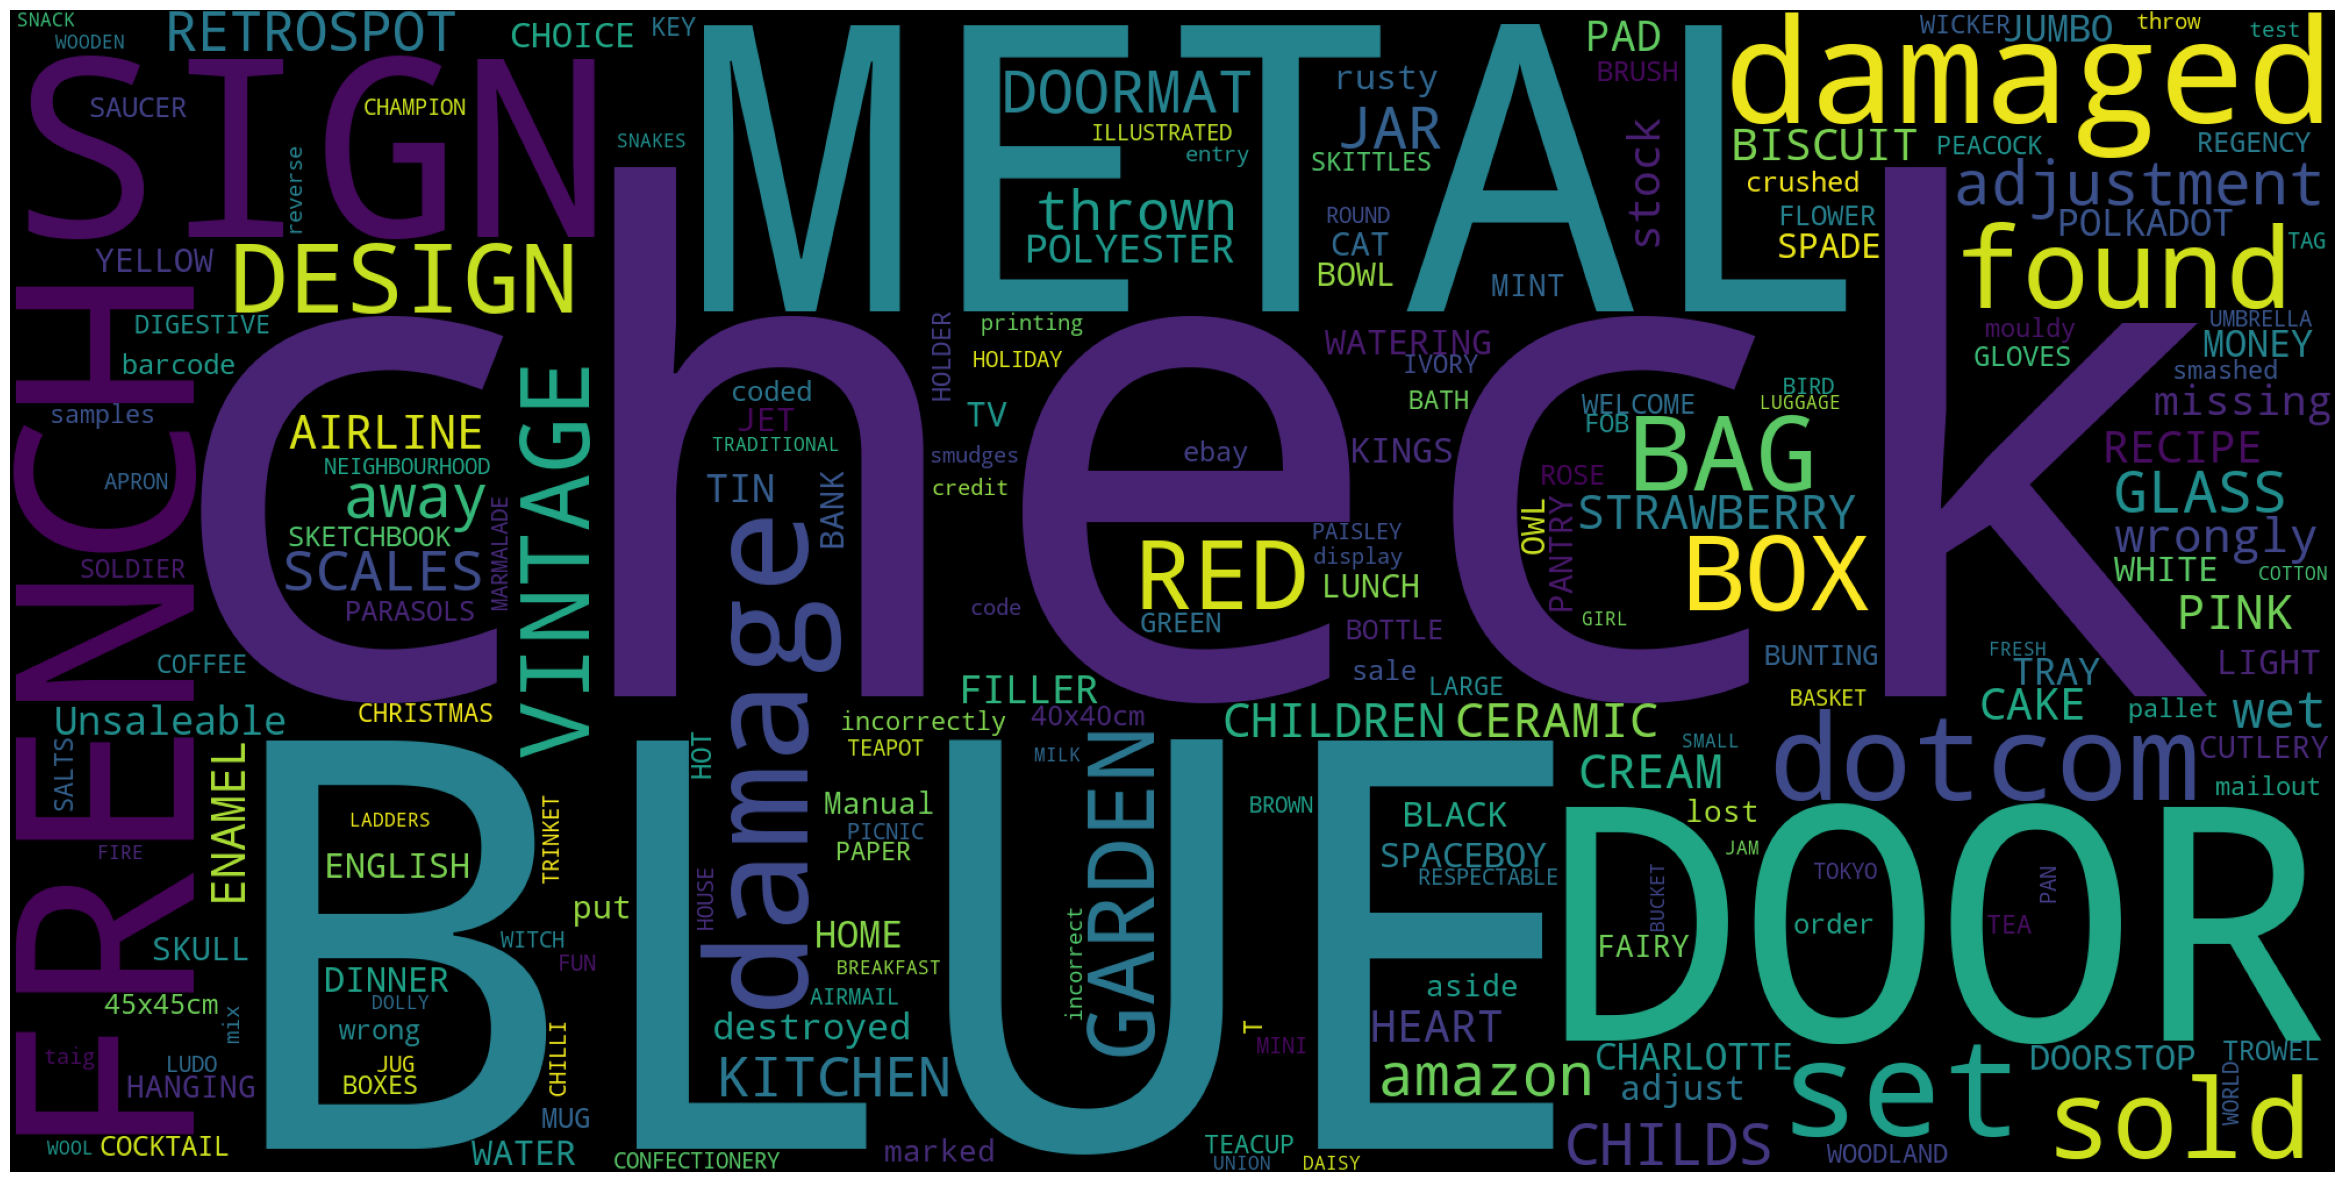

In [12]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

` It can be seen that most common words are damaged, check , found,... are not names of any product so we can drop them `

In [13]:
df = df[~((df["Price"]<=0)|(df["Quantity"]<=0))]
df[['Quantity','Price']].describe()

Quantity          Price
count  519551.000000  519551.000000
mean       10.398361       3.887894
std       157.004952      35.954045
min         1.000000       0.001000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   13541.330000

### Tạo thêm cột Total Price = Price * Quantity

In [14]:
df['Total price'] = df.Price*df.Quantity

In [15]:
# Categorical_feature = ["BillNo", "Itemname", "CustomerID", "Country"]
# def convert_cat(df,features):
#     for feature in features:
#         df[feature] = df[feature].astype('category')
# convert_cat(df,Categorical_feature)

In [16]:
df.groupby(['Year','Month'])['Total price'].sum()

Year  Month
2010  12        809584.230
2011  1         667348.270
      2         504110.560
      3         680937.780
      4         528064.801
      5         750270.080
      6         728512.720
      7         670612.991
      8         734246.640
      9        1008307.912
      10       1119034.830
      11       1471012.430
      12        629851.730
Name: Total price, dtype: float64

In [17]:
df=df[~(df['Year'] == 2010)]
df.groupby(['Year','Month'])['Total price'].sum()

Year  Month
2011  1         667348.270
      2         504110.560
      3         680937.780
      4         528064.801
      5         750270.080
      6         728512.720
      7         670612.991
      8         734246.640
      9        1008307.912
      10       1119034.830
      11       1471012.430
      12        629851.730
Name: Total price, dtype: float64

<a id="section-two"></a>
## <b><span style='color:#22f0d8'> 2. |</span> Let's explore the data for any insights. 

  Let's find which countries sell the most items, and what items are the most popular in each country in 2011

<Axes: xlabel='Month'>

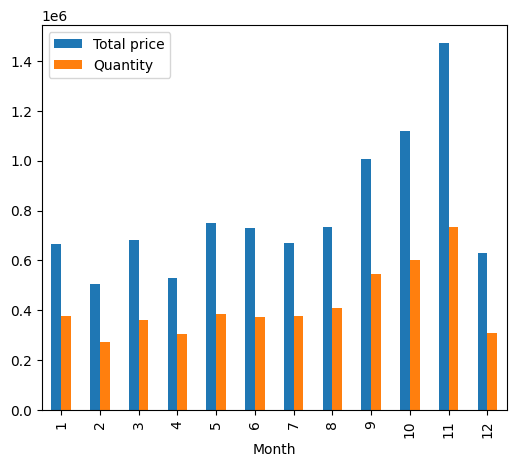

In [18]:
df_country = df.groupby('Month')[['Total price','Quantity']].sum()
df_country.plot(kind='bar', xlabel='Month', figsize=(6, 5))

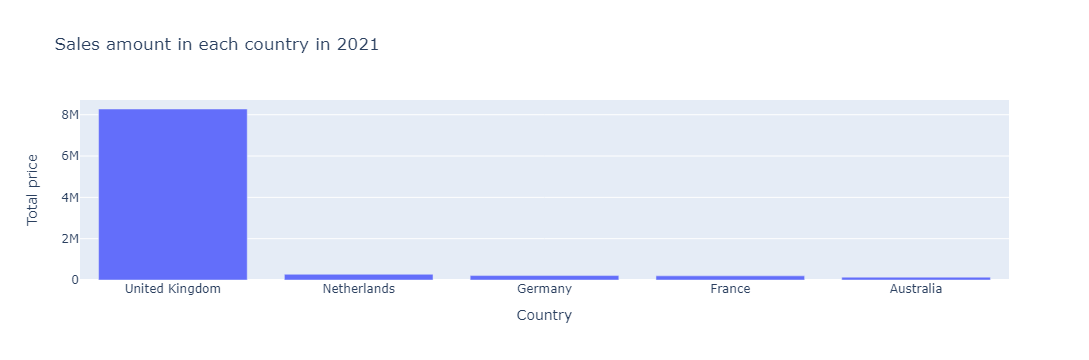

In [19]:
country=df.groupby('Country')['Total price'].sum().sort_values(ascending= False).head(5).reset_index()
fig=px.bar(country,x='Country',y='Total price',title='Sales amount in each country in 2021')
fig.show()


UK is the most purchased country

In [20]:
item_sales=df.groupby('Itemname')['Total price'].sum().sort_values(ascending=False)[:10].reset_index()
item_sales.style.background_gradient(cmap='copper', subset=pd.IndexSlice[:, 'Total price'])

In [21]:
cm=sns.light_palette("blue",as_cmap=True)
item_sales=df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10]
item_sales.to_csv('item_sales.csv')
item_sales=pd.read_csv('item_sales.csv')
item_sales.style.background_gradient(cmap=cm,axis = 0)

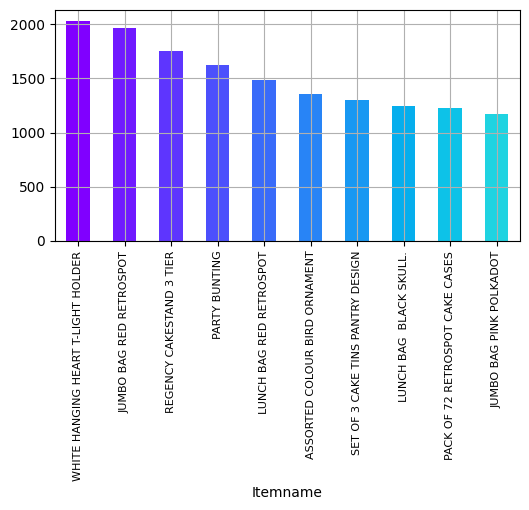

In [34]:
# Frequency of Most popular items
color=plt.cm.rainbow(np.linspace(0,1,30))
df['Itemname'].value_counts().head(10).plot.bar(color=color,figsize=(6,3))
plt.xticks(rotation=90,fontsize=8)
plt.grid()
plt.show()

<a id="section-three"></a>
## <b><span style='color:#22f0d8'> 3. |</span> Association Analysis

In [22]:
# Exploring the different regions of transactions 
df.Country.unique() 

array(['United Kingdom', 'Sweden', 'France', 'Australia', 'Germany',
       'Spain', 'Portugal', 'Israel', 'Belgium', 'Italy', 'Netherlands',
       'Poland', 'Switzerland', 'Greece', 'Hong Kong', 'Singapore',
       'Iceland', 'Lebanon', 'Austria', 'Norway', 'Japan',
       'United Arab Emirates', 'Saudi Arabia', 'Unspecified', 'Brazil',
       'USA', 'Bahrain', 'Malta', 'RSA'], dtype=object)

In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [24]:
# Stripping extra spaces in the description 
df['Itemname'] = df['Itemname'].str.strip()  

In [25]:
basket_UK = (df[df['Country'] =="United Kingdom"] 
          .groupby(['BillNo', 'Itemname'])['Quantity'] 
          .sum().unstack().reset_index() .fillna(0)
          .set_index('BillNo')) 

In [26]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket = basket_UK.applymap(my_encode_units)
my_basket.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item
### Display sample of set
my_basket.head()

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
539993                         0                           0   
540001                         0                           0   
540002                         0                           0   
540003                         0                           0   
540004                         0                           0   

Itemname  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
BillNo                                                           
539993                            0                          0   
540001                            0                          0   
540002                            0                          0   
540003                            0                          0   
540004                            0                          0   

Itemname  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
BillNo                                                                     
539993                               0                                 0   
540001                               0                                 0   
540002                               0                                 0   
540003                               0                                 0   
540004                               0                                 0   

Itemname  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
BillNo                                                                     
539993                                  0                              0   
540001                                  0                              0   
540002                                  0                              0   
540003                                  0                              0   
540004                                  0                              0   

Itemname  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
BillNo                                                                       
539993                                      0                            0   
540001                                      0                            0   
540002                                      0                            0   
540003                                      0                            0   
540004                                      0                            0   

Itemname  ...  ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH  \
BillNo    ...                                                        
539993    ...                         0                          0   
540001    ...                         0                          0   
540002    ...                         0                          0   
540003    ...                         0                          0   
540004    ...                         0                          0   

Itemname  ZINC SWEETHEART WIRE LETTER RACK  ZINC T-LIGHT HOLDER STAR LARGE  \
BillNo                                                                       
539993                                   0                               0   
540001                                   0                               0   
540002                                   0                               0   
540003                                   0                               0   
540004                                   0                               0   

Itemname  ZINC T-LIGHT HOLDER STARS LARGE  ZINC T-LIGHT HOLDER STARS SMALL  \
BillNo                                                                       
539993                                  0                                0   
540001                                  0                                0   
540002                                  0                                0   
540003                                  0      

In [27]:
frq_items = apriori(my_basket, min_support = 0.03, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head(5) 

C:\Users\hanhd\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents                         consequents  \
5      (PINK REGENCY TEACUP AND SAUCER)   (GREEN REGENCY TEACUP AND SAUCER)   
29     (PINK REGENCY TEACUP AND SAUCER)   (ROSES REGENCY TEACUP AND SAUCER)   
7     (GREEN REGENCY TEACUP AND SAUCER)   (ROSES REGENCY TEACUP AND SAUCER)   
6     (ROSES REGENCY TEACUP AND SAUCER)   (GREEN REGENCY TEACUP AND SAUCER)   
3   (GARDENERS KNEELING PAD CUP OF TEA)  (GARDENERS KNEELING PAD KEEP CALM)   

    antecedent support  consequent support   support  confidence       lift  \
5             0.042174            0.052552  0.034572    0.819742  15.598636   
29            0.042174            0.053759  0.032762    0.776824  14.450148   
7             0.052552            0.053759  0.039399    0.749713  13.945839   
6             0.053759            0.052552  0.039399    0.732884  13.945839   
3             0.045252            0.054181  0.032641    0.721333  13.313339   

    leverage  conviction  zhangs_metric  
5   0.032356    5.256080       0.977101  
29  0.030495    4.239888       0.971781  
7   0.036574    3.780624       0.979784  
6   0.036574    3.546958       0.981033  
3   0.030190    3.394086       0.968724

<a id="section-four"></a>
## <b><span style='color#22f0d82'> 4. |</span> Conclusion

_In this project, we have explored and revealed some interesting findings:_

 - November is The Most Important Months In Sales, (Black Friday - kicking off the holiday shopping season/ NOV 28 - 
Cyber Monda/ ...)  
 - The UK has the most amount of sales
 - The most amount of sales and the most popular item sold in global is 'PAPER CRAFT, LITTLE BIRDIE'. - The most frequently purchased item is WHITE HANGING HEART T-LIGHT HOLDER.
 - 
The best combination items arK REGENCY TEACUP AND SAUCERin Green/Roses/Pink color (that makes sense because in fact, UK people love tea so much)..

*Project limitation:*

The findings should also be taken with a grain of salt for a number of reasons:

 - One year limit (in 2011)
 - I have only considered rules for UK, the number of sales from other country is quite small which might not be representative to apply association analysis
 - There are many other factors that haven't been taken into the analysis